In [1]:
import pandas as pd 
import numpy as np
import math 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm 
from statsmodels.tsa.ar_model import AutoReg as AR

In [2]:
#importing all the classifyers

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

from sklearn.linear_model import SGDClassifier 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
#importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


Importing data from dataset

In [4]:

df=pd.read_csv("dataset_sdn.csv")
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


Analysing the data

In [5]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [7]:
#column names
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

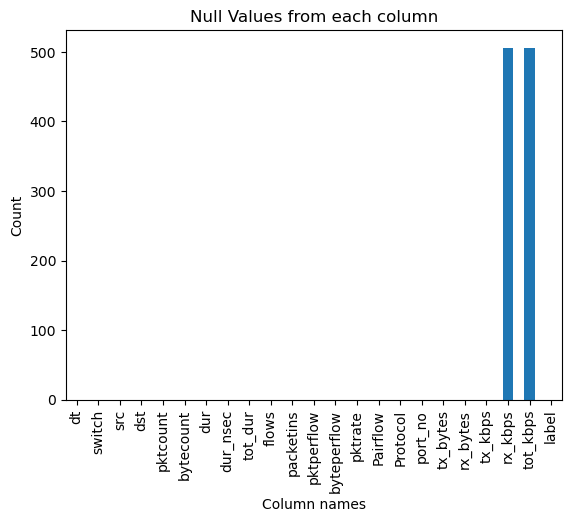

In [8]:
#Null values sum

df.isnull().sum().plot.bar()
plt.title("Null Values from each column")
plt.xlabel("Column names")
plt.ylabel("Count")

In [9]:
#Dropping rows having null values

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [10]:
#Getting unique destination 
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination: ", total_dst)
print("Different destination: ",uniq_dest)

Total destination:  18
Different destination:  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

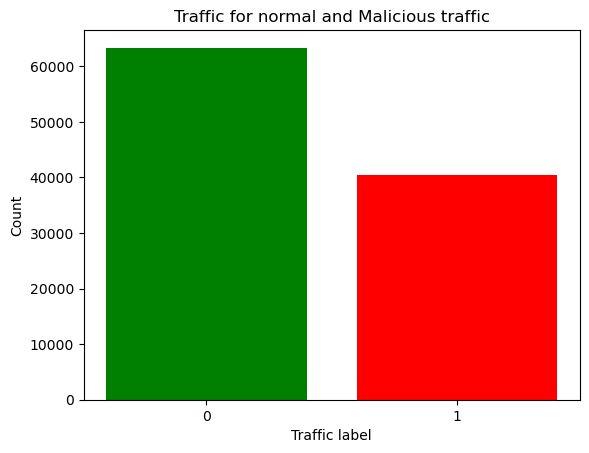

In [11]:
# Doing analysis for malicious and normal traffic
gp=df.groupby('label') ['label'].count()
plt.bar(list(gp.index), list(gp.values),color=['g', 'r'])
plt.xticks(list (gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

Text(0.5, 1.0, 'Attack and Normal traffic ')

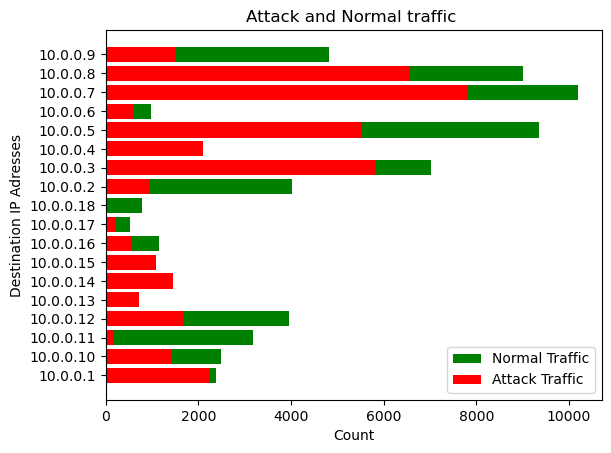

In [12]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")

In [13]:
# Columns containing object(string) type data

# Port no column also does not do much so ignoring it also 
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
udp_df = df[df['Protocol'] == 'UDP'].drop(columns=object_col)
tcp_df = df[df['Protocol'] == 'TCP'].drop(columns=object_col)
icmp_df = df[df['Protocol'] == 'ICMP'].drop(columns=object_col) 
icmp_df

#['src', 'dst', 'Protocol', 'port_no']

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


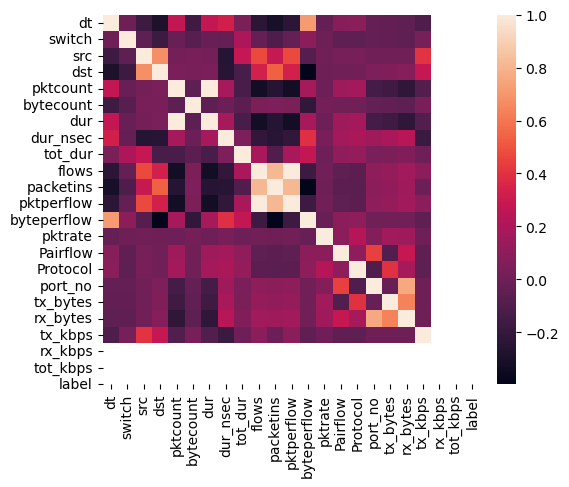

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

covar_matrix_original=numeric_df.corr()
col_names=df.columns
hm=sns.heatmap(covar_matrix_original,
               cbar=True,
               square=True,
               xticklabels=col_names,
               yticklabels=col_names)

In [15]:
df_s= pd.read_csv("dataset_sdn.csv")
df_s=df_s.drop(["src"],axis=1)
df_s=df_s.drop(["dst"], axis=1)
df_s=df_s.drop(["rx_kbps"], axis=1) 
df_s=df_s.drop(["tot_kbps"], axis=1)

## these things should not be dropped. we have to come up with something so that we can work on strings and NAN.
encoder = OneHotEncoder (handle_unknown='ignore')
encoder_df = pd.DataFrame (encoder.fit_transform (df_s[['Protocol']]).toarray())
final_df = df_s.join(encoder_df)
df_df=final_df.drop(["Protocol"], axis=1)

x=df_df.drop(["label"], axis=1)
y=df_df["label"]

data_d, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.3,
                                                   random_state=42, 
                                                   shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                     shuffle=True)

data_d["label"]=y_train

x_train_0=data_d[df_df ["label"]==0]
x_train_1=data_d[df_df ["label"]==1]

x_train_0=x_train_0.drop(["label"], axis=1)
x_train_1=x_train_1.drop(["label"], axis=1)

ll=list(x_train_0.columns)

#converting the names to string
#x_train_0.columns = x_train_0.columns.astype(str)
#x_train_1.columns = x_train_1.columns.astype(str)
x_train.columns = x_train.columns.astype(str)

normalize=MinMaxScaler()
normalize.fit(x_train)
x_train_norm=normalize.transform(x_train)

x_test.columns = x_test.columns.astype(str)
x_test_norm=normalize.transform(x_test)

@ ------  dt
@ ------  switch
@ ------  pktcount
@ ------  bytecount
@ ------  dur
@ ------  dur_nsec
@ ------  tot_dur
@ ------  flows
@ ------  packetins
@ ------  pktperflow
@ ------  byteperflow
@ ------  pktrate
@ ------  Pairflow
@ ------  port_no
@ ------  tx_bytes
@ ------  rx_bytes
@ ------  tx_kbps
@ ------  0
@ ------  1
@ ------  2


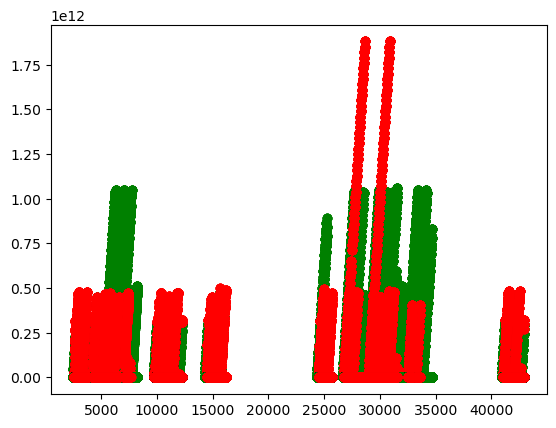

In [16]:
ll=list(x_train_0.columns)
for i in ll:
    print("@ ------ ",i)
    plt.scatter(x_train_0["dt"],x_train_0[i],color="g")
    plt.scatter(x_train_1["dt"],x_train_1[i],color="r")
    plt.show

@ ------  dt vs dt
@ ------  dt vs switch
@ ------  dt vs pktcount
@ ------  dt vs bytecount
@ ------  dt vs dur
@ ------  dt vs dur_nsec
@ ------  dt vs tot_dur
@ ------  dt vs flows
@ ------  dt vs packetins
@ ------  dt vs pktperflow
@ ------  dt vs byteperflow
@ ------  dt vs pktrate
@ ------  dt vs Pairflow
@ ------  dt vs port_no
@ ------  dt vs tx_bytes
@ ------  dt vs rx_bytes
@ ------  dt vs tx_kbps
@ ------  dt vs 0
@ ------  dt vs 1
@ ------  dt vs 2
@ ------  switch vs dt
@ ------  switch vs switch
@ ------  switch vs pktcount
@ ------  switch vs bytecount
@ ------  switch vs dur
@ ------  switch vs dur_nsec
@ ------  switch vs tot_dur
@ ------  switch vs flows
@ ------  switch vs packetins
@ ------  switch vs pktperflow
@ ------  switch vs byteperflow
@ ------  switch vs pktrate
@ ------  switch vs Pairflow
@ ------  switch vs port_no
@ ------  switch vs tx_bytes
@ ------  switch vs rx_bytes
@ ------  switch vs tx_kbps
@ ------  switch vs 0
@ ------  switch vs 1
@ ------  

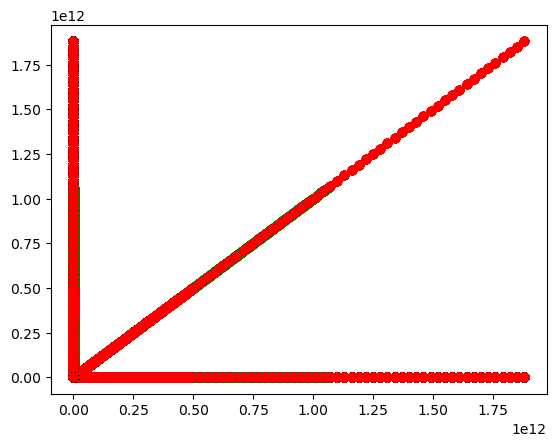

In [17]:
for i in ll:
    for j in ll:
        print("@ ------ ",i,"vs",j)
        plt.scatter(x_train_0[i],x_train_0[j],color="g")
        plt.scatter(x_train_1[i],x_train_1[j],color="r", alpha=0.3)
        plt.show

@ ------  dur  vs  tot_dur


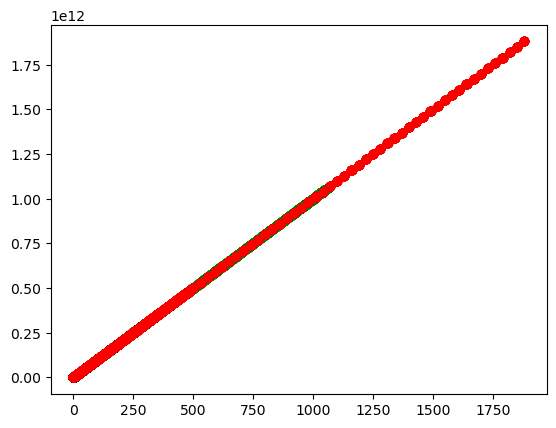

@ ------  tot_dur  vs  dur


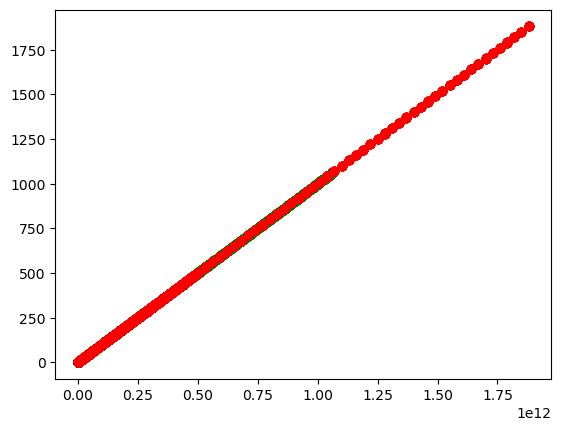

@ ------  pktperflow  vs  pktrate


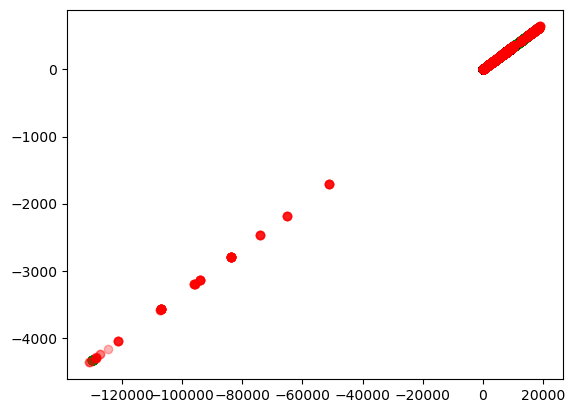

@ ------  pktrate  vs  pktperflow


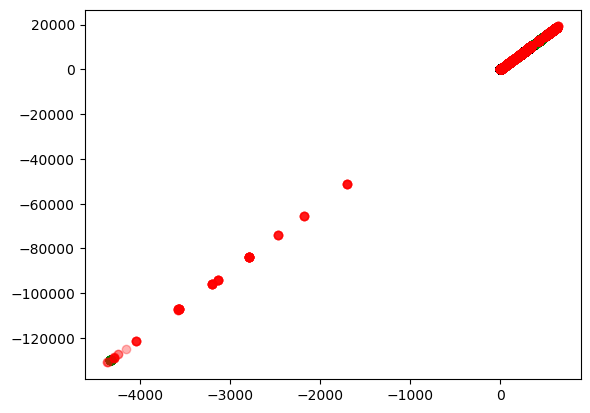

In [19]:
for i in ll:
    for j in ll:
         if i != j and not str(i).isnumeric() and not str(j).isnumeric():
        #if i != j and not i.isnumeric() and not j.isnumeric():
            co = df_df[i].corr(df_df[j])
            if abs(co) >= 0.9:
        #co=df_df[i].corr(df_df[j])
        #if (i!=j) and (abs (co) >= 0.9):
                print("@ ------ ",i," vs ",j)
                plt.scatter(x_train_0[i],x_train_0[j], color="g")
                plt.scatter(x_train_1[i],x_train_1[j], color="r", alpha=0.3)
                plt.show()

Data Modeling 

Protocol-Wise

In [20]:
df_s= pd.read_csv("dataset_sdn.csv")
df_s=df_s.drop(["src"], axis=1) 
df_s=df_s.drop(["dst"], axis=1)
df_s=df_s.drop(["rx_kbps"], axis=1) 
df_s=df_s.drop(["tot_kbps"],axis=1)

## these things should not be dropped. we have to come up with something so that we can work on strings and NAN.

encoder = OneHotEncoder (handle_unknown='ignore')
encoder_df = pd.DataFrame (encoder.fit_transform(df_s[['Protocol']]).toarray())
final_df = df_s.join(encoder_df)
df_df-final_df.drop(["Protocol"],axis=1)

x=df_df.drop(["label"], axis=1)
y=df_df["label"]

data_d, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=42, 
                                                    shuffle=True)
data_d["label"]=y_train

x_train_0=data_d[df_df["label"]==0]
x_train_1=data_d[df_df["label"]==1]

x_train_0=x_train_0.drop(["label"],axis=1)
x_train_1=x_train_1.drop(["label"],axis=1)

ll=list(x_train_0.columns)

x_train.columns = x_train.columns.astype(str)

normalize=MinMaxScaler()
normalize.fit(x_train)
x_train_norm=normalize.transform(x_train)

# normalize.fit(x_test)
x_test.columns = x_test.columns.astype(str)
x_test_norm=normalize.transform(x_test)


In [21]:
ptc=df['Protocol'].unique()
ptc

array(['UDP', 'TCP', 'ICMP'], dtype=object)

Data Modeling 

After one hot encoding

In [23]:
from pandas import Index

display(x_train_0.columns) 
display(x_train_0.head())

Index([         'dt',      'switch',    'pktcount',   'bytecount',
               'dur',    'dur_nsec',     'tot_dur',       'flows',
         'packetins',  'pktperflow', 'byteperflow',     'pktrate',
          'Pairflow',     'port_no',    'tx_bytes',    'rx_bytes',
           'tx_kbps',             0,             1,             2],
       dtype='object')


Index([         'dt',      'switch',    'pktcount',   'bytecount',
               'dur',    'dur_nsec',     'tot_dur',       'flows',
         'packetins',  'pktperflow', 'byteperflow',     'pktrate',
          'Pairflow',     'port_no',    'tx_bytes',    'rx_bytes',
           'tx_kbps',             0,             1,             2],
      dtype='object')

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,0,1,2
11824,11124,4,22504,23989264,49,282000000,4.928200e+10,3,558,13454,14341964,448,0,2,2882,2966,0,0.0,0.0,1.0
8062,11155,3,13877,14792882,30,840000000,3.084000e+10,2,558,13593,14490138,453,0,2,3273,1352,0,0.0,0.0,1.0
93780,30951,7,80,7840,82,790000000,8.279000e+10,11,4942,29,2842,0,1,3,135725335,406297293,3,1.0,0.0,0.0
72260,7747,4,89639,100869430,212,325000000,2.120000e+11,11,25224,13491,14794278,449,1,3,320173280,321207229,12154,0.0,1.0,0.0
2533,11965,2,31826,33926516,70,657000000,7.065700e+10,2,2242,13525,14417650,450,0,4,3926,3590,0,0.0,0.0,1.0


Index([         'dt',      'switch',    'pktcount',   'bytecount',
               'dur',    'dur_nsec',     'tot_dur',       'flows',
         'packetins',  'pktperflow', 'byteperflow',     'pktrate',
          'Pairflow',     'port_no',    'tx_bytes',    'rx_bytes',
           'tx_kbps',             0,             1,             2],
      dtype='object')

|\    /|    |````
| \  / |    |
|  \/  |    |---
|      |    |
|      |    |_____

GMM

@ For Q =  2  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18616   496]
 [ 2786  9406]]


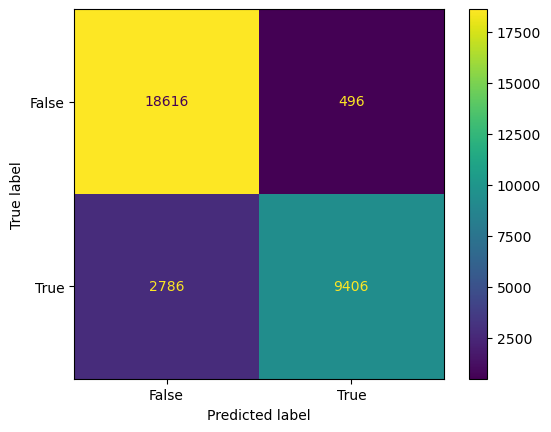

CLASSIFICATION ACCURACY  0.8951571684129823
 
@ For Q =  3  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18946   166]
 [ 4159  8033]]


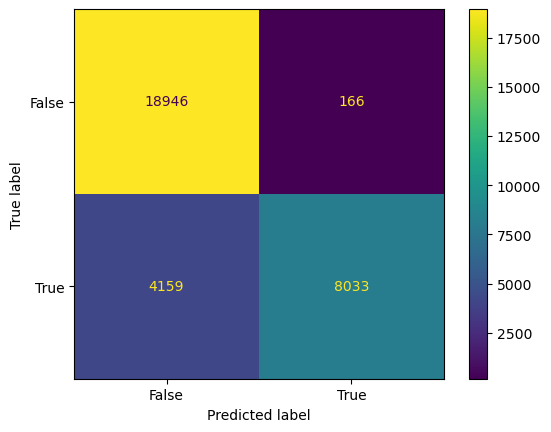

CLASSIFICATION ACCURACY  0.8618387426526961
 
@ For Q =  4  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18524   588]
 [ 3085  9107]]


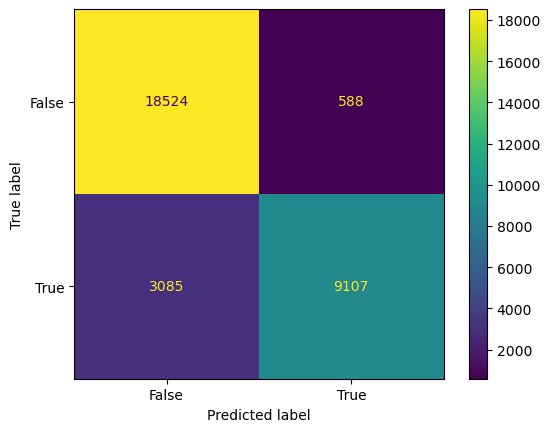

CLASSIFICATION ACCURACY  0.8826667518527984
 
@ For Q =  5  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18221   891]
 [ 1093 11099]]


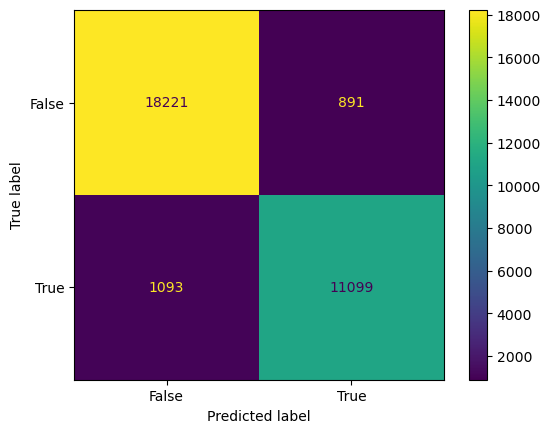

CLASSIFICATION ACCURACY  0.9366215180168669
 
@ For Q =  6  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18608   504]
 [ 3695  8497]]


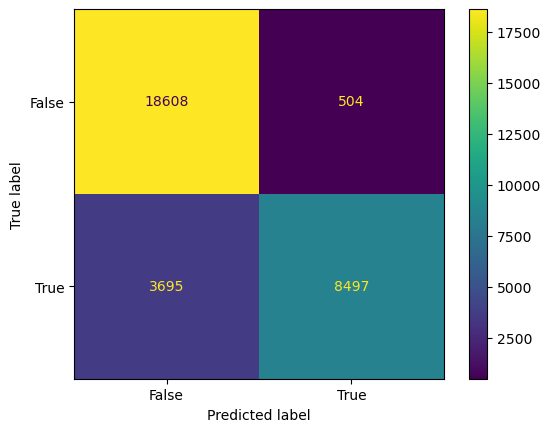

CLASSIFICATION ACCURACY  0.8658637873754153
 
@ For Q =  7  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18477   635]
 [ 1229 10963]]


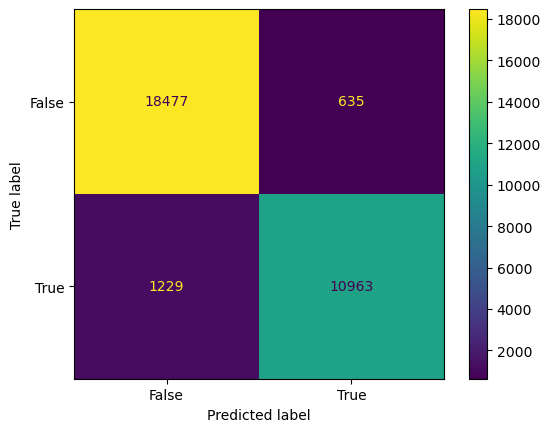

CLASSIFICATION ACCURACY  0.9404548939432661
 
@ For Q =  8  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[17927  1185]
 [  727 11465]]


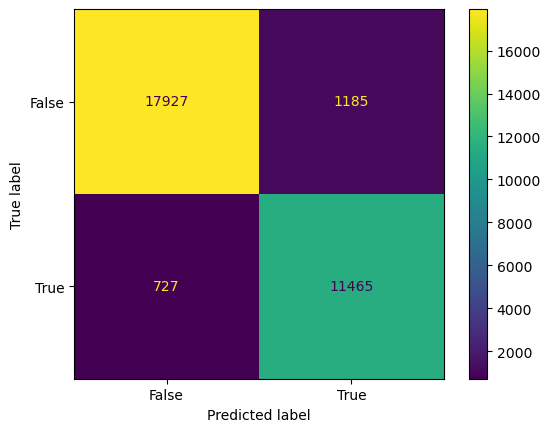

CLASSIFICATION ACCURACY  0.9389215435727064
 
@ For Q =  9  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[16433  2679]
 [  149 12043]]


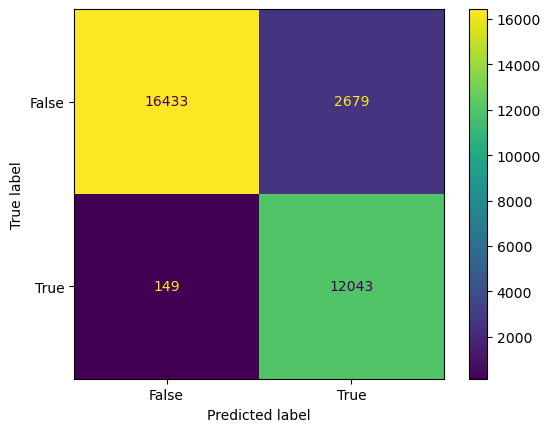

CLASSIFICATION ACCURACY  0.909660107334526
 
@ For Q =  10  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18031  1081]
 [ 4099  8093]]


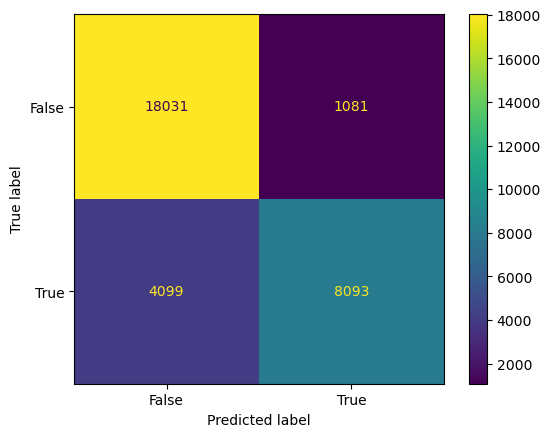

CLASSIFICATION ACCURACY  0.8345259391771019
 
@ For Q =  11  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18161   951]
 [  558 11634]]


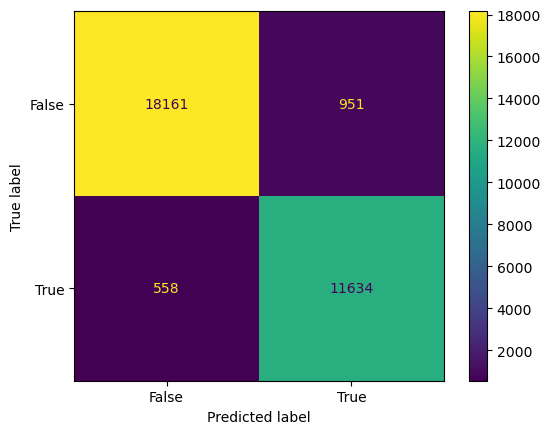

CLASSIFICATION ACCURACY  0.9517952977255303
 
@ For Q =  12  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18534   578]
 [  418 11774]]


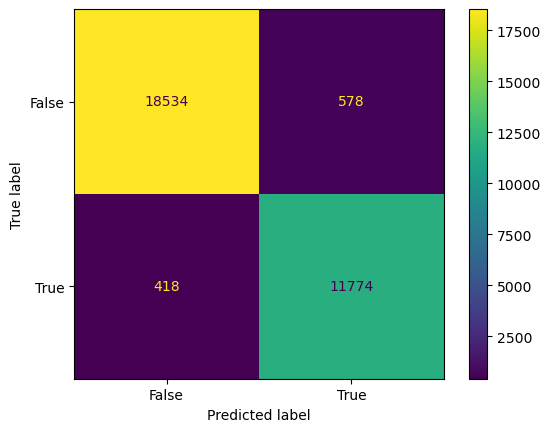

CLASSIFICATION ACCURACY  0.9681829798108867
 
@ For Q =  13  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18136   976]
 [  553 11639]]


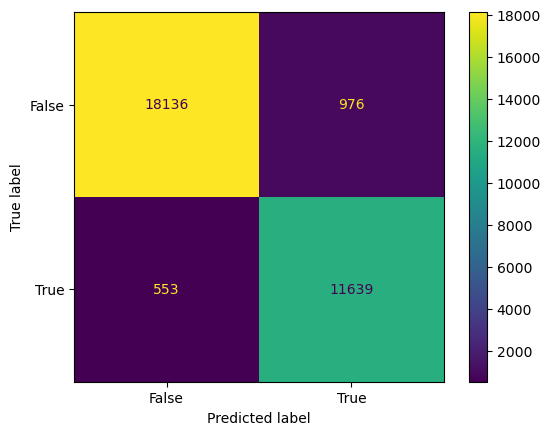

CLASSIFICATION ACCURACY  0.9511564017377971
 
@ For Q =  14  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18364   748]
 [  608 11584]]


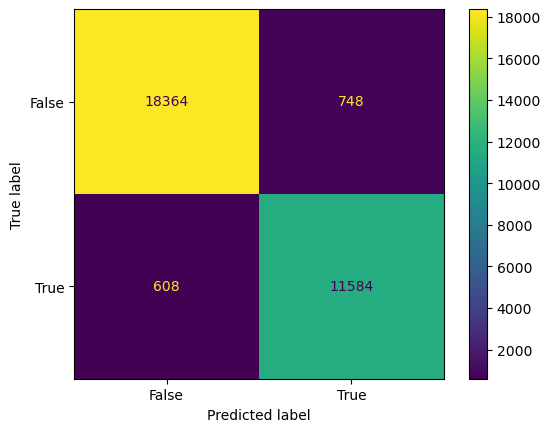

CLASSIFICATION ACCURACY  0.9566828520316892
 


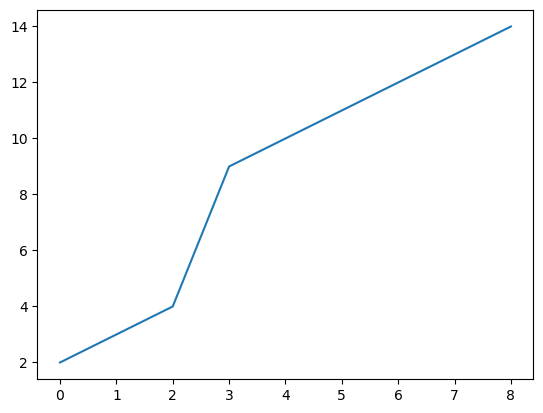

In [24]:
x_train_0.columns = x_train_0.columns.astype(str)
x_train_1.columns = x_train_1.columns.astype(str)

ll=[]
for ii in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
    gmm0=GaussianMixture (n_components = ii , covariance_type ='full', reg_covar=10e-5)
    gmm0.fit(x_train_0)

    gmm1=GaussianMixture (n_components = ii , covariance_type ='full',reg_covar=10e-5)
    gmm1.fit(x_train_1)

    # making 2 GMM model for 2 classes e and 1
    
    pre_ref=np.argmax ( [gmm0.score_samples (x_test), gmm1.score_samples (x_test)], axis=0)
    
    ac_sc=accuracy_score (y_test, pre_ref)
    con_m=confusion_matrix (y_test, pre_ref)
    print("@ For Q = ",ii," the confusion matrix and prediction score is: ")
    print("CONFUSION MATRIX ")
    print(con_m)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = con_m, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    ll.append(ac_sc)
    print("CLASSIFICATION ACCURACY ", ac_sc)
    print(" ")

plt.plot([2,3,4,9,10,11,12,13,14])

KNearest Neighbour

@ For k =  1  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18581   531]
 [  630 11562]]


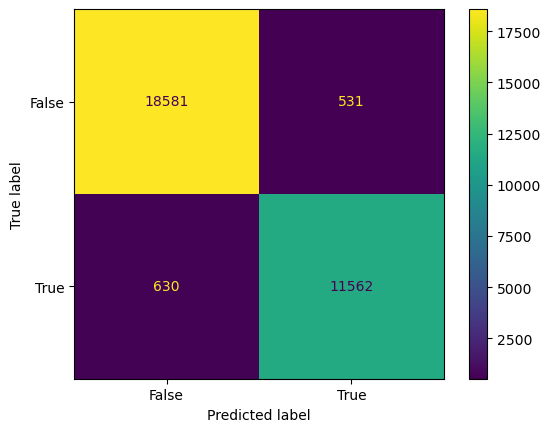

CLASSIFICATION ACCURACY  0.9629120879120879
 
@ For k =  3  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18544   568]
 [  715 11477]]


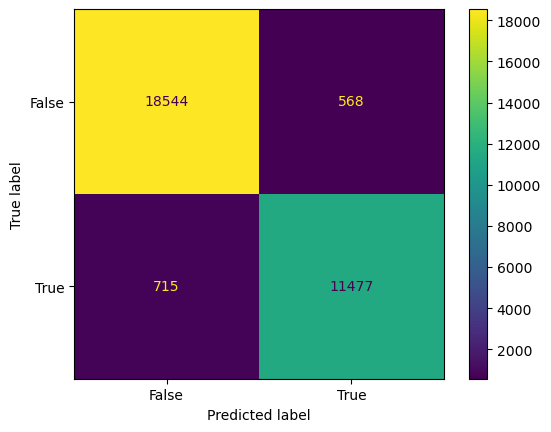

CLASSIFICATION ACCURACY  0.9590148223869154
 
@ For k =  5  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18482   630]
 [  741 11451]]


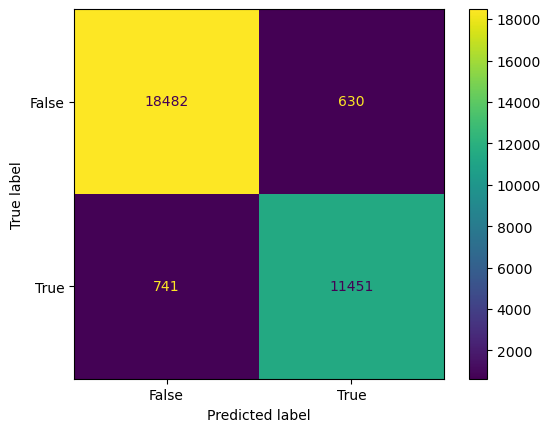

CLASSIFICATION ACCURACY  0.9562036800408893
 
@ For k =  7  the confusion matrix and prediction score is: 
CONFUSION MATRIX 
[[18441   671]
 [  770 11422]]


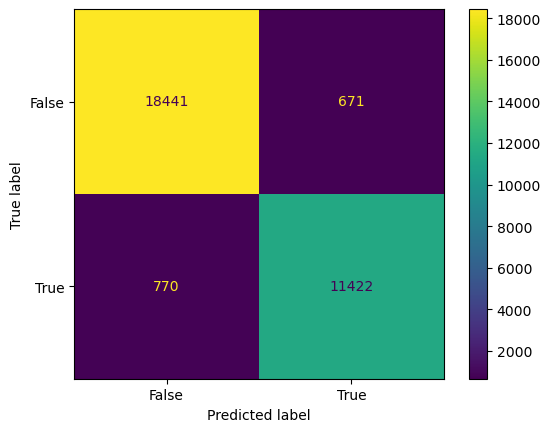

CLASSIFICATION ACCURACY  0.9539675440838231
 


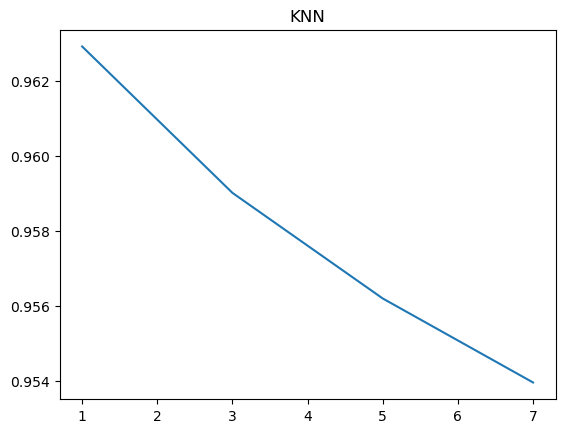

In [25]:
k=[1,3,5,7]
t_nor=[]

for i in k:
    clf=KNeighborsClassifier (n_neighbors=i) 
    clf.fit(x_train_norm, y_train)

    pre_ref=clf.predict(x_test_norm)
    ac_sc=accuracy_score (y_test, pre_ref)
    t_nor.append(ac_sc)
    con_m=confusion_matrix (y_test, pre_ref)
    print("@ For k = ",i," the confusion matrix and prediction score is: ") 
    print("CONFUSION MATRIX ")
    print(con_m)
    cm_display= ConfusionMatrixDisplay (confusion_matrix=con_m, display_labels=[False, True])
    cm_display.plot()
    plt.show()
    print("CLASSIFICATION ACCURACY ", ac_sc)
    print(" ")

plt.title("KNN")
plt.plot(k,t_nor)
plt.show()

KMeans Cluster

Purity value is  0.6226556135895347
Purity value is  0.47343907230820836
Purity value is  0.39631990033063397
Purity value is  0.3615027073649911
Purity value is  0.39631990033063397
Purity value is  0.31591355599214144


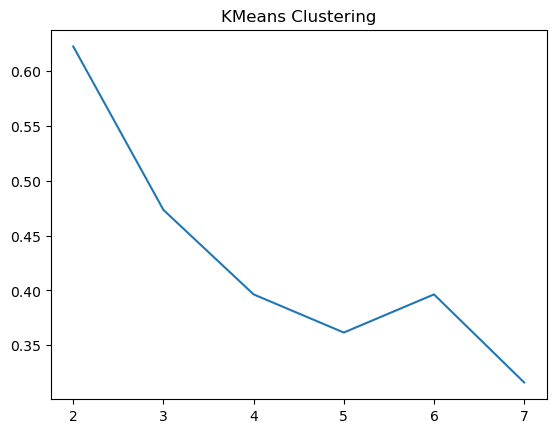

In [26]:
x.columns = x.columns.astype(str)

normalize=MinMaxScaler() 
normalize.fit(x)
x_n=normalize.transform(x)

def purity_score (y_true, y_pred):
    contingency_matrix=metrics.cluster.contingency_matrix(y_true, y_pred) #contingency matrix
    row_ind, col_ind = linear_sum_assignment (-contingency_matrix) #optimal one-to-one mapping between 
    return contingency_matrix[row_ind, col_ind].sum()/np. sum(contingency_matrix)

#x_train.drop(["Label"], axis=1)
l=[2,3,4,5,6,7]
lst=[]

for p in l:
    kmeans=KMeans(n_clusters=p) 
    pred = kmeans.fit_predict(x_n)
    pu_sc = purity_score (y.values, pred)
    print("Purity value is ",pu_sc) 
    lst.append(pu_sc)

plt.title("KMeans Clustering")
plt.plot(l, lst)
plt.show()

Random Forest

@ For estimator number  1  Accuracy is 
0.9990736008177868
[[19100    12]
 [   17 12175]]


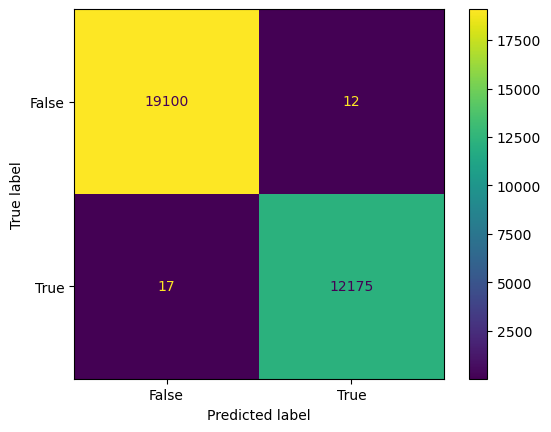

@ For estimator number  5  Accuracy is 
0.9998722208024534
[[19108     4]
 [    0 12192]]


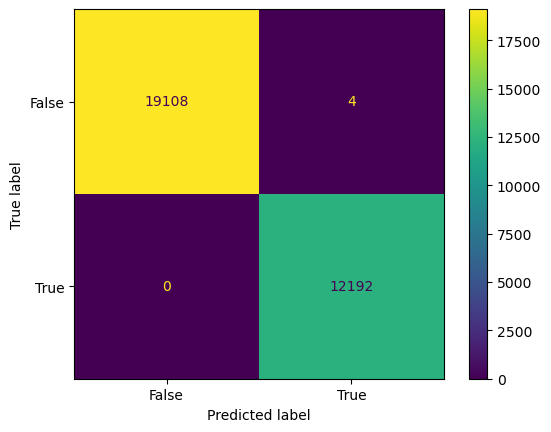

@ For estimator number  10  Accuracy is 
0.99990416560184
[[19112     0]
 [    3 12189]]


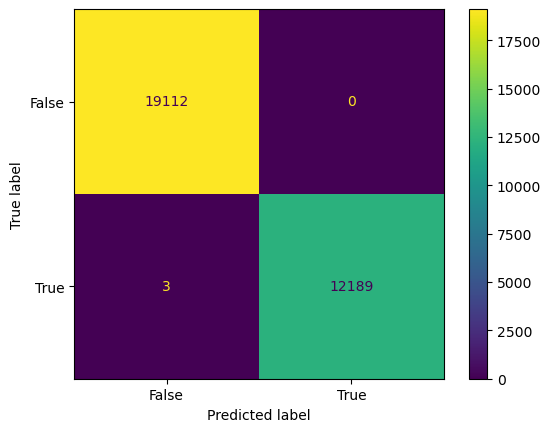

@ For estimator number  15  Accuracy is 
1.0
[[19112     0]
 [    0 12192]]


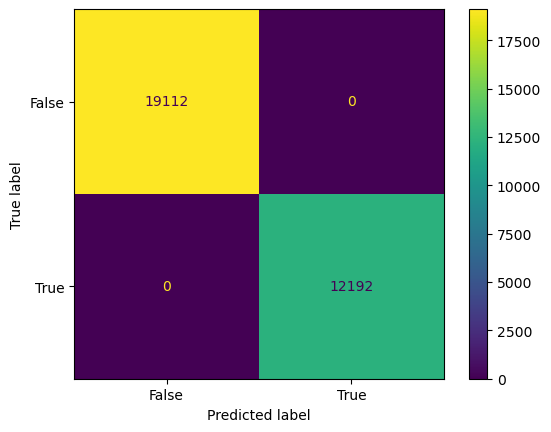

@ For estimator number  20  Accuracy is 
1.0
[[19112     0]
 [    0 12192]]


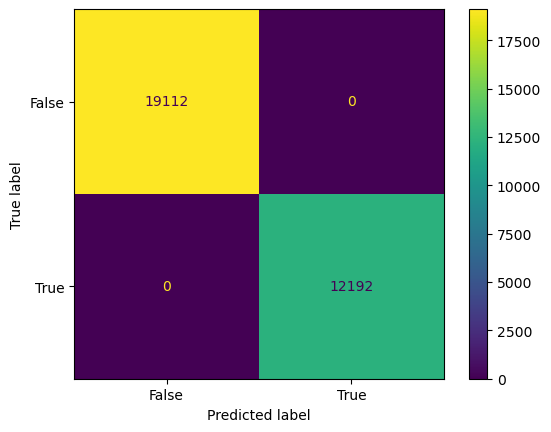

In [27]:
x_dropped=x_train

for jj in [1,5,10,15,20]:
    clf = RandomForestClassifier(n_estimators = jj)
    clf.fit(x_dropped,y_train)
    pred = clf.predict(x_test)
    ac_sc = accuracy_score (y_test, pred)
    print("@ For estimator number ", jj," Accuracy is ")
    print(ac_sc)
    con_m=confusion_matrix (y_test, pred)
    print(con_m)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = con_m, display_labels = [False, True]) 
    cm_display.plot()
    plt.show()

SVM

In [28]:
clf =  SVC(kernel='rbf')
clf.fit(x_dropped[["dur", "tot_dur"]], y_train)

pred = clf.predict(x_test[["dur", "tot_dur"]])
ac_sc=accuracy_score(y_test,pred)

ac_sc

0.6778686429849221